<a href="https://colab.research.google.com/github/EddyGiusepe/Keras_rede_neural_WEIGHT_REGULARIZATION/blob/main/ML_Mastery_Weight_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Weight Regularization**


Neste Notebook estudaremos como reduzir o **sobreajuste de uma rede neural de aprendizado profundo** usando a **regularização de peso**.

Um modelo com pesos grandes é mais complexo do que um modelo com pesos menores. É um sinal de uma rede que pode ser excessivamente especializada em dados de treinamento.

O algoritmo de aprendizagem pode ser atualizado para encorajar a rede a usar pequenos pesos.


Uma forma de fazer isso é alterar o cálculo da <font color='orange'>função de perda (Loss)</font> usado na otimização da rede para considerar também o tamanho dos pesos. **Isso é chamado de regularização de peso ou redução de peso**.

**Keras** oferece suporte à regularização de peso por meio do argumento ``kernel_regularizer`` em uma camada, que pode ser configurada para usar a norma do vetor $L1$ ou $L2$, por exemplo:

model.add(Dense(500, input_dim=2, activation='relu', kernel_regularizer=l2(0.01)))

​
O exemplo a seguir demonstra um modelo de **Perceptron multicamadas** com redução de peso em um problema de classificação binária.




**NOTA:**
O site deste código pode ser encontrado [aqui](https://machinelearningmastery.com/better-deep-learning-neural-networks-crash-course/).

## Importamos nossas livrarias

Exemplo de decaimento do pesso.

In [1]:
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2
from matplotlib import pyplot



## Geramos nossos Datasets

In [2]:
x, y = make_circles(n_samples=100, noise=0.1, random_state=1)

## Dividimos nosso Dataset em Dados de treino e Dados de teste

In [3]:
n_train = 30

trainx, testx = x[:n_train, :], x[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]


## Definimos nosso modelo (criamos a nossa Rede Neural)

In [4]:
model = Sequential()

model.add(Dense(500, input_dim = 2, activation='relu', kernel_regularizer=l2(0.01)))

model.add(Dense(1, activation='sigmoid'))



## Compilamos nossa Rede Neural

In [5]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])


## AJustamos nossa Rede Neural (fit model)

In [6]:
history = model.fit(trainx, trainy, validation_data=(testx, testy), epochs=450, verbose=1)

Epoch 1/450
1/1 [==============================] - 1s 928ms/step - loss: 0.7330 - accuracy: 0.5000 - val_loss: 0.7368 - val_accuracy: 0.4286
Epoch 2/450
1/1 [==============================] - 0s 45ms/step - loss: 0.7293 - accuracy: 0.7000 - val_loss: 0.7377 - val_accuracy: 0.4286
Epoch 3/450
1/1 [==============================] - 0s 43ms/step - loss: 0.7257 - accuracy: 0.6667 - val_loss: 0.7388 - val_accuracy: 0.4571
Epoch 4/450
1/1 [==============================] - 0s 145ms/step - loss: 0.7224 - accuracy: 0.6000 - val_loss: 0.7399 - val_accuracy: 0.4714
Epoch 5/450
1/1 [==============================] - 0s 44ms/step - loss: 0.7192 - accuracy: 0.5667 - val_loss: 0.7411 - val_accuracy: 0.4714
Epoch 6/450
1/1 [==============================] - 0s 45ms/step - loss: 0.7161 - accuracy: 0.5667 - val_loss: 0.7424 - val_accuracy: 0.4714
Epoch 7/450
1/1 [==============================] - 0s 42ms/step - loss: 0.7132 - accuracy: 0.5667 - val_loss: 0.7438 - val_accuracy: 0.4714
Epoch 8/450
1/1 [=

## Avaliamos nossa Rede Neural (Evaluate the model)

In [7]:
_, train_acc = model.evaluate(trainx, trainy, verbose=1)
print("")
print("")
_, test_acc = model.evaluate(testx, testy, verbose=1)

1/1 [==============================] - 0s 17ms/step - loss: 0.4806 - accuracy: 0.8333


3/3 [==============================] - 0s 3ms/step - loss: 0.6849 - accuracy: 0.6143


In [8]:
# Imprimindo esses valores:
print(" Train: %0.3f, Test: %0.3f " % (train_acc, test_acc))

 Train: 0.833, Test: 0.614 


## Graficamos as curvas de aprendizagens

### Gráfico das curvas de aprendizagem da Função Loss

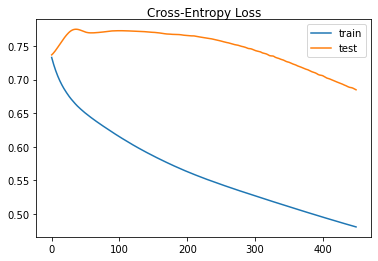

In [9]:
#pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

### Gráfico das curvas de aprendizagem da accuracy

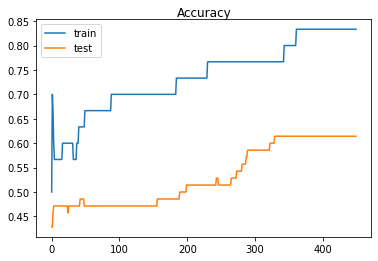

In [10]:
#pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

Tenta executar o exemplo de código com e sem regularização de peso e descrever o efeito que isso tem nas curvas de aprendizado durante o treinamento.